## Goal of the Poject

In this project, we’ll use time-series forecasting to forecast store sales on data from **Corporación Favorita**, a large Ecuadorian-based grocery retailer.

Specifically, we'll build a model that more accurately predicts the unit sales for thousands of items sold at different **Favorita stores**. We'll practice machine learning skills with an approachable training dataset of dates, store, and item information, promotions, and unit sales.

### Context

Forecasts are especially relevant to brick-and-mortar grocery stores, which must dance delicately with how much inventory to buy. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leading to lost revenue and upset customers. More accurate forecasting, thanks to machine learning, could help ensure retailers please customers by having just enough of the right products at the right time.

Current subjective forecasting methods for retail have little data to back them up and are unlikely to be automated. The problem becomes even more complex as retailers add new locations with unique needs, new products, ever-transitioning seasonal tastes, and unpredictable product marketing.



### Dataset Description
- We will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.

#### File Descriptions and Data Field Information

##### train.csv

- The training data, comprising time series of features **store_nbr**, **family**, and **onpromotion** as well as the target sales.
- **store_nbr** identifies the store at which the products are sold.
- **family** identifies the type of product sold.
- **sales** gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
- **onpromotion** gives the total number of items in a product family that were being promoted at a store at a given date.

##### test.csv

- The test data, having the same features as the training data. You will predict the target **sales** for the dates in this file.
- The dates in the test data are for the 15 days after the last date in the training data.

##### sample_submission.csv
- A sample submission file in the correct format.

##### stores.csv
- Store metadata, including **city**, **state**, **type, and **cluster**.
- **cluster** is a grouping of similar stores.

##### oil.csv
- Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

##### holidays_events.csv
- Holidays and Events, with metadata
- NOTE: Pay special attention to the **transferred column**. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
- Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

##### Additional Notes
- Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
- A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

## FIRST, EDA
- Here, we explore our data.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
#reading dataset
path = '/Users/apple/Downloads/train.csv'
df = pd.read_csv(path)
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [3]:
#path = '/Users/apple/Downloads/sample_submission.csv'
#submission = pd.read_csv(path)
#submission

In [4]:
#details of datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [5]:
#dataset description
df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [6]:
#convert date dtype from object to datetime
df['date'] = pd.to_datetime(df['date'])

In [7]:
#extracting year,month and day from date
df['Year'] = df['date'].dt.year
df['Month']= df['date'].dt.month
df['Day']= df['date'].dt.day
df.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1


In [8]:
#checking to see how it works for time
#df['date'].dt.second

In [9]:
#checking to see the effect of the above code
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   Year         int64         
 7   Month        int64         
 8   Day          int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 206.1+ MB


In [10]:
#creating a function that prints out the unique values and its length of any column given to it
def col_details(x):
    print ('This column has {} unique values\n'.format(len(x.unique())))
    print('The unique values are: \n',x.unique())
    print('\nThere are {} null values in this column\n'.format(x.isnull().sum()))
    print('The count for each unique value is:\n', x.value_counts())

- WE USE THE ABOVE FUNCTION TO CHECK DETAILS FOR ALL COLUMNS

In [11]:
#calling out columns
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'Year',
       'Month', 'Day'],
      dtype='object')

In [12]:
#using our function to collect details on column 'id'
col_details(df.id)

This column has 3000888 unique values

The unique values are: 
 [      0       1       2 ... 3000885 3000886 3000887]

There are 0 null values in this column

The count for each unique value is:
 0          1
2000584    1
2000586    1
2000587    1
2000588    1
          ..
1000298    1
1000299    1
1000300    1
1000301    1
3000887    1
Name: id, Length: 3000888, dtype: int64


In [13]:
col_details(df.date)

This column has 1684 unique values

The unique values are: 
 ['2013-01-01T00:00:00.000000000' '2013-01-02T00:00:00.000000000'
 '2013-01-03T00:00:00.000000000' ... '2017-08-13T00:00:00.000000000'
 '2017-08-14T00:00:00.000000000' '2017-08-15T00:00:00.000000000']

There are 0 null values in this column

The count for each unique value is:
 2013-01-01    1782
2016-01-15    1782
2016-02-08    1782
2016-02-07    1782
2016-02-06    1782
              ... 
2014-07-13    1782
2014-07-12    1782
2014-07-11    1782
2014-07-10    1782
2017-08-15    1782
Name: date, Length: 1684, dtype: int64


In [14]:
#checking for the number of years
list(df.Year.unique())

[2013, 2014, 2015, 2016, 2017]

In [15]:
#details of 'store_nbr' column
col_details(df.store_nbr)

This column has 54 unique values

The unique values are: 
 [ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54  6  7  8  9]

There are 0 null values in this column

The count for each unique value is:
 1     55572
46    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
47    55572
10    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
35    55572
34    55572
33    55572
32    55572
11    55572
12    55572
13    55572
14    55572
15    55572
16    55572
17    55572
18    55572
19    55572
2     55572
20    55572
21    55572
22    55572
23    55572
24    55572
25    55572
26    55572
27    55572
28    55572
29    55572
3     55572
30    55572
31    55572
9     55572
Name: store_nbr, dtype: int64


In [16]:
col_details(df.family)

This column has 33 unique values

The unique values are: 
 ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']

There are 0 null values in this column

The count for each unique value is:
 AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUO

In [17]:
col_details(df.onpromotion)

This column has 362 unique values

The unique values are: 
 [  0   3   5   1  56  20  19   2   4  18  17  12   6   7  10   9  50   8
  16  42  51  13  15  47  21  40  37  54  24  58  22  59  11  45  25  55
  26  43  35  14  28  46  36  32  53  57  27  39  41  30  29  49  23  48
  44  38  31  52  33  34  61  60 116  86  73 113 102  68 104  93  70  92
 121  72 178 174 161 118 105 172 163 167 142 154 133 180 181 173 165 168
 186 140 149 145 169 188  62  84 111  65 107  63 101  87 125  94 114 171
 153 170 166 141 155 179 192 131 147 151 189  79  74 110  64  67  99 123
 157 117 150 182 162 160 194 135 190  69 108  89 126 156 103 146 132 177
 164 176 112  75 109  91 128 175 187 148 137 184 196 144 158 119 106  66
 100  90 120 115  98 159 152 185 139 143  80 124  71 134 193  78  88 122
 130  81  97 138 191  76  96 198  82  95 195 183 199 200 201 197  77  83
 136 205 204 202 129 206  85 209 211 207 208 203 210 127 213 212 218 216
 217 214 222 220 223 229 225 228 224 231 215 233 230 235 227 221

In [18]:
col_details(df.sales)

This column has 379610 unique values

The unique values are: 
 [0.000000e+00 2.000000e+00 8.100000e+02 ... 4.381330e+02 1.545530e+02
 2.419729e+03]

There are 0 null values in this column

The count for each unique value is:
 0.000       939130
1.000       115291
2.000        85959
3.000        68575
4.000        57846
             ...  
116.541          1
363.533          1
141.322          1
409.879          1
2419.729         1
Name: sales, Length: 379610, dtype: int64


- DATA IS CLEAN

In [19]:
#visiualizing relationships between columns in the dataset
#sns.pairplot(df)

In [20]:
#checking for correlation
df.corr()

,id,store_nbr,sales,onpromotion,Year,Month,Day
id,1.000000,3.013308e-04,0.085784,0.206260,9.776028e-01,6.743357e-02,5.915116e-03
store_nbr,0.000301,1.000000e+00,0.041196,0.007286,8.754910e-15,-4.946280e-15,-2.656089e-16
sales,0.085784,4.119605e-02,1.000000,0.427923,8.109275e-02,1.978967e-02,-1.188702e-02
onpromotion,0.206260,7.285647e-03,0.427923,1.000000,1.990601e-01,2.588107e-02,2.207588e-03
Year,0.977603,8.754910e-15,0.081093,0.199060,1.000000e+00,-1.432929e-01,-1.254521e-02
Month,0.067434,-4.946280e-15,0.019790,0.025881,-1.432929e-01,1.000000e+00,2.622160e-03
Day,0.005915,-2.656089e-16,-0.011887,0.002208,-1.254521e-02,2.622160e-03,1.000000e+00


- From the catplot and the correlation syntax, we can't see any direct relationship between the 
  features and the target variable

In [21]:
#visualizing an overview of sales over the years in the dataset
#plt.figure(figsize = (15,10))
#sns.lineplot(data = df, x= 'Year', y = 'sales')
#plt.show()

In [22]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'Year',
       'Month', 'Day'],
      dtype='object')

In [23]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1


In [24]:
df1 = df.copy()
df1.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1


In [25]:
df1 = df1.set_index('date')
df1.head()

,id,store_nbr,family,sales,onpromotion,Year,Month,Day
date,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013,1,1
2013-01-01,1,1,BABY CARE,0.0,0,2013,1,1
2013-01-01,2,1,BEAUTY,0.0,0,2013,1,1
2013-01-01,3,1,BEVERAGES,0.0,0,2013,1,1
2013-01-01,4,1,BOOKS,0.0,0,2013,1,1


In [26]:
#converting to datetime
pd.to_datetime(df1.index)

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=3000888, freq=None)

In [27]:
#putting the sales and the date in a dataframe
df2 = df1.sales.to_frame()
df2.index = pd.to_datetime(df2.index)
df2

,sales
date,
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
...,...
2017-08-15,438.133
2017-08-15,154.553
2017-08-15,2419.729


In [28]:
df2 = df2.groupby(by=[df2.index]).sum()
df2

,sales
date,
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124
2013-01-04,354459.677093
2013-01-05,477350.121229
...,...
2017-08-11,826373.722022
2017-08-12,792630.535079
2017-08-13,865639.677471


In [29]:
#converting the index to datetime
df2.index = pd.to_datetime(df2.index)
df2['Year'] = df2.index.year
df2['Month'] = df2.index.month
df2['Day'] = df2.index.day

In [30]:
df2

,sales,Year,Month,Day
date,,,,
2013-01-01,2511.618999,2013,1,1
2013-01-02,496092.417944,2013,1,2
2013-01-03,361461.231124,2013,1,3
2013-01-04,354459.677093,2013,1,4
2013-01-05,477350.121229,2013,1,5
...,...,...,...,...
2017-08-11,826373.722022,2017,8,11
2017-08-12,792630.535079,2017,8,12
2017-08-13,865639.677471,2017,8,13


##### Visualizing how sales has been over the years

<AxesSubplot:xlabel='Month', ylabel='sales'>

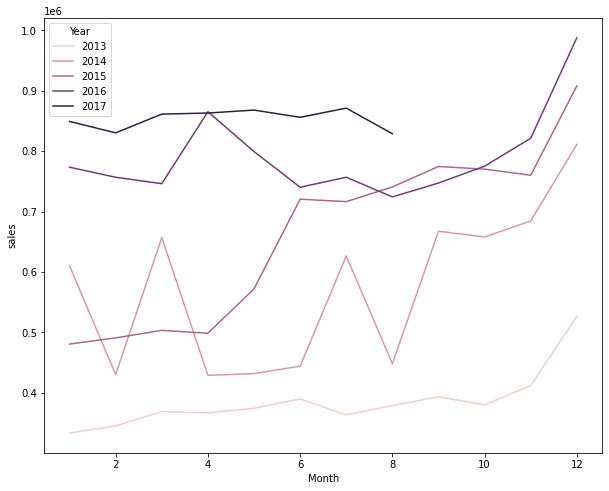

In [31]:
#Visualising each year by month
plt.figure(figsize=(10,8))
sns.lineplot(x='Month',y='sales',hue='Year',data=df2,ci=None)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


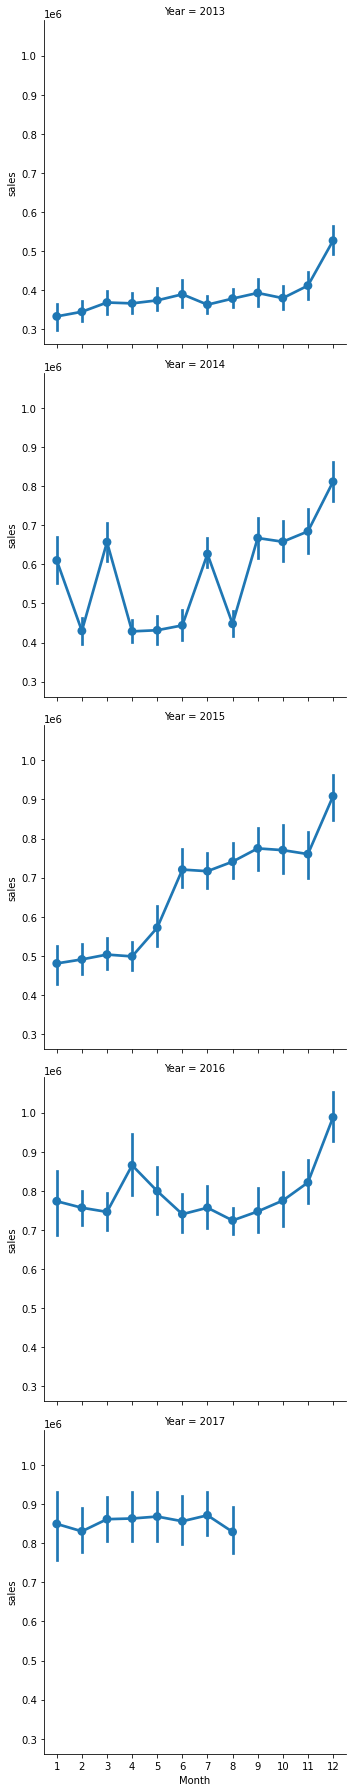

In [32]:
# Sales trend over the months and year
sns.factorplot(data = df2, x ="Month", y = "sales", row = "Year")

- THE LINE PLOT SHOWS HOW ALL THE YEAR'S SALES HAVE BEEN ALTOGETHER WHILE THE FACTOR PLOT GIVES US EACH YEAR'S SALES SEPARATELY.
- FROM THE TWO PLOTS, WE CAN INFER THAT SALES TEND TO SPIKE IN DECEMBER(END OF THE YEAR)
- THIS MAKES SENSE BECAUSE OF THE CHRISTMAS AND HOLIDAY SEASON.
- THIS CONFIRMS THAT THE SALES VARY WITH THE DATE(TIME) AND THERE IS A 'SEASONALITY' FACTOR PRESENT IN OUR DATA.

<AxesSubplot:xlabel='date'>

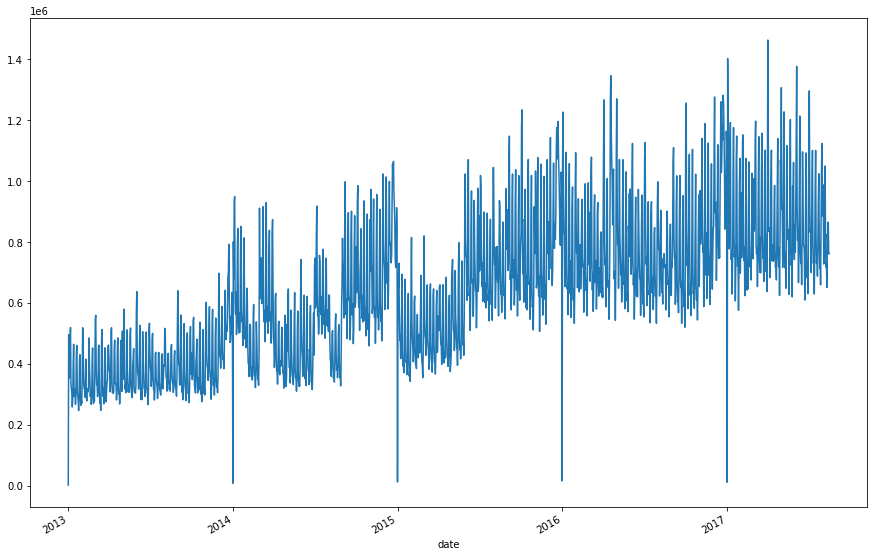

In [33]:
#visualizing sales
sales_df = df2.sales
sales_df.plot(figsize = (15,10))

- FROM THE PLOT ABOVE, THERE IS A RESONATING DROP IN SALES AT THE BEGINNING OF EVERY YEAR. THIS TELLS US THAT SALES USUALLY DROP AT THE BEGINNING OF THE YEAR DUE TO THE RUSH IN THE HOLIDAY SEASON.

<AxesSubplot:xlabel='date'>

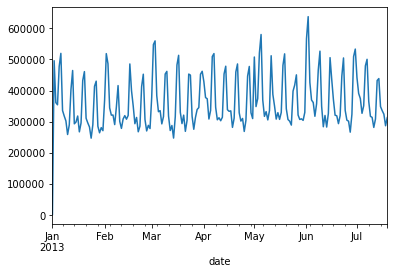

In [34]:
#visualizing the first 200 points
sales_df[:200].plot()

In [35]:
#checking for null values
df2.isnull().sum()

sales    0
Year     0
Month    0
Day      0
dtype: int64

#### Augmented Dicky-Fuller test (ADF Test)

- This test called Augmented Dicky-Fuller test provides us the statistical data such as p-value(probability)
- To understand whether we can reject the null hypothesis. 
- The null hypothesis is that data is not stationary and the alternative hypothesis says that data is stationary. 
- If the p-value is less than (say 0.5), 
- we will reject the null hypothesis and say that data is stationary.

In [36]:
#importing libraries for the test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(sales_df, autolag = 'AIC')

print("1. ADF :",dftest[0])
print("2. P-Value :" ,dftest[1])
print("3. Num of Lags :",dftest[2])
print("4. Num of Observations Used for ADF Regression and Critical Values Calculation :",dftest[3])
print("5. Critical Values :\n",dftest[4])
for key, val in dftest[4].items():
    print("\t", key, ":", val)

1. ADF : -2.616195748604857
2. P-Value : 0.08969592175787466
3. Num of Lags : 22
4. Num of Observations Used for ADF Regression and Critical Values Calculation : 1661
5. Critical Values :
 {'1%': -3.4342930672797065, '5%': -2.8632816397229064, '10%': -2.567697207194407}
	 1% : -3.4342930672797065
	 5% : -2.8632816397229064
	 10% : -2.567697207194407


- We can see from the above plot and statistical test that mean and variation don’t change much with time i.e they are constant. 
- Thus, we don’t need to perform any transformation (needed when time series is not stationary) because our data has proven to be STATIONARY.

### MODEL 1

### Building Our Linear Regression Model

##### Using Timestep features(time dummy)

In [37]:
#Create a time dummy
time = np.arange(len(df2.sales.index))
time

array([   0,    1,    2, ..., 1681, 1682, 1683])

In [38]:
#adding the dummy to the dataframe
df2['time'] = time
df2

,sales,Year,Month,Day,time
date,,,,,
2013-01-01,2511.618999,2013,1,1,0
2013-01-02,496092.417944,2013,1,2,1
2013-01-03,361461.231124,2013,1,3,2
2013-01-04,354459.677093,2013,1,4,3
2013-01-05,477350.121229,2013,1,5,4
...,...,...,...,...,...
2017-08-11,826373.722022,2017,8,11,1679
2017-08-12,792630.535079,2017,8,12,1680
2017-08-13,865639.677471,2017,8,13,1681


In [39]:
#define the model
from sklearn.linear_model import LinearRegression

#Selecting the features and target
X = df2.loc[:, ['time']]  # features
y = df2.loc[:, 'sales']  # target

In [40]:
#importing libraries for data splitting
from sklearn.model_selection import train_test_split

#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,
                                                random_state = 1)

In [41]:
#define and fit the model
model1 = LinearRegression()
lr_model = model1.fit(X_train, y_train)
lr_model

LinearRegression()

In [42]:
#coefficient
model1.coef_

array([346.53391003])

In [43]:
#intercept
model1.intercept_

346733.02570849523

- Therefore equation of line: (target = 346.326 * time + 346733.0257)

In [44]:
#predicting on test data
predicted = lr_model.predict(X_test)
predicted

array([673514.50286987, 892523.93401089, 802078.58349221, 546683.09179769,
       769157.86203905, 684950.12190096, 599356.24612275, 544950.42224752,
       782326.15062031, 691534.2661916 , 786138.02363068, 491584.2001024 ,
       540445.48141709, 385198.28972219, 430247.69802651, 383812.15408205,
       866187.35684836, 779207.34543001, 906731.82432225, 812128.06688317,
       662771.95165883, 732425.26757552, 916781.30771322, 439604.11359741,
       687375.8592712 , 664851.15511903, 384158.68799209, 483960.45408167,
       731039.13193539, 902226.88349182, 583415.68626122, 638168.04404647,
       372723.06896099, 882474.45061993, 787870.69318084, 708514.42778323,
       480495.11498134, 913662.50252292, 671435.29940967, 834306.2371253 ,
       696732.27484209, 566435.52466959, 702276.81740263, 467326.82640007,
       404604.18868405, 602128.51740301, 853019.0682671 , 742474.75096649,
       878662.57760956, 533168.26930639, 764999.45511865, 530049.46411609,
       729652.99629526, 8

#### EVALUATION METRICS

In [45]:
#ROOT MEAN SQUARED ERROR
from sklearn.metrics import mean_squared_error
mean_squared_error(predicted,y_test, squared = False)

158814.98711215664

In [46]:
#MEAN SQUARED ERROR
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predicted)

127040.45047655934

In [47]:
#R2 SCORE
from sklearn.metrics import r2_score
r2_score(predicted,y_test)

0.09098251172541183

In [48]:
#MEAN SQUARED LOGERROR
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(predicted,y_test)

0.1298190552852864

<AxesSubplot:ylabel='sales'>

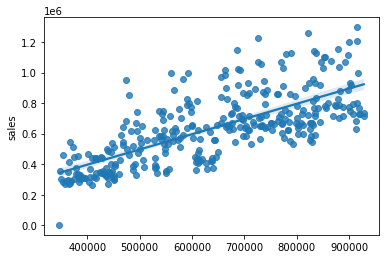

In [49]:
#visualizing relationship between predicted and true values
sns.regplot(x = predicted, y = y_test)

- Linear regression using time dummies doesn't seem to be a good model
- We try another model

#### INSIGHTS ON LINEAR REGRESSION
- We cannot predict effectively using time for the test data directly.
- To predict using lag features, we will concatenate our train and test data, then using rolling average to predict the sales and then pick out our predicted from there.


### MODEL 2

### MODEL SELECTION

#### AUTO-REGRESSION MODEL
The second model to be used is an AUTO-REGRESSION model(AR) with a lag of n on the differenced dataset.
- The first thing to do is to transform the data by differencing, with each observation transformed as:
- value(t) = obs(t) - obs(t-1)
- Here, the regression coefficients learned by the model are used to make predictions in a rolling manner across the test dataset.
- As each time step in the dataset is executed, the prediction is made using the coefficients and stored. The actual observation for the time step is then made available and stored to be used as a lag variable for future predictions.

In [50]:
#import libraries
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import DataFrame
from pandas import concat

In [51]:
df2.head()

,sales,Year,Month,Day,time
date,,,,,
2013-01-01,2511.618999,2013,1,1,0
2013-01-02,496092.417944,2013,1,2,1
2013-01-03,361461.231124,2013,1,3,2
2013-01-04,354459.677093,2013,1,4,3
2013-01-05,477350.121229,2013,1,5,4


In [52]:
df3 = df2.drop(['Year','Month','Day','time'], axis = 1)
df3.head()

,sales
date,
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124
2013-01-04,354459.677093
2013-01-05,477350.121229


In [53]:
# create lagged dataset
values = DataFrame(df3.sales)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1'] #adding as columns to the dataset

In [54]:
#calling out the dataframe
dataframe

,t-1,t+1
date,,
2013-01-01,NaN,2511.618999
2013-01-02,2511.618999,496092.417944
2013-01-03,496092.417944,361461.231124
2013-01-04,361461.231124,354459.677093
2013-01-05,354459.677093,477350.121229
...,...,...
2017-08-11,651386.911970,826373.722022
2017-08-12,826373.722022,792630.535079
2017-08-13,792630.535079,865639.677471


In [55]:
# persistence model
def model_persistence(x):
 return x

In [56]:
#calling out test dataframe
test = pd.read_csv('/Users/apple/Downloads/test.csv')
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [57]:
test2 = test.set_index('date') #set date as index
test2.head()

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0


In [58]:
test3 = test2.drop(['id','store_nbr','family','onpromotion'],axis = 1) #drop unwanted columns
test3.head()

""
date
2017-08-16
2017-08-16
2017-08-16
2017-08-16
2017-08-16


In [59]:
test3 = test3.groupby(by = [test3.index]).sum() #groupby date

In [60]:
test3.head()
test3.reset_index()

,date
0,2017-08-16
1,2017-08-17
2,2017-08-18
3,2017-08-19
4,2017-08-20
5,2017-08-21
6,2017-08-22
7,2017-08-23
8,2017-08-24
9,2017-08-25


In [61]:
# walk-forward validation
predictions = list()
for x in test3:
 yhat = model_persistence(x)
 predictions.append(yhat)

In [62]:
#creating train and test data
X2 = df3.values
train = X2[:len(X2)-7]
testing = X2[len(X2)-7:] #last 7 values as test

In [63]:
model2 = AutoReg(train, lags=20)
ar_model = model2.fit()
print('Coefficients: %s' % ar_model.params)

Coefficients: [ 2.23063486e+04  4.78651366e-01 -4.21524226e-02  1.41508612e-01
  3.89584408e-02  2.57295744e-02  6.69611548e-02  2.64532626e-01
 -1.08820933e-01 -1.17247347e-01 -3.42745379e-02  2.18333264e-02
 -4.41713703e-02  8.30066957e-02  3.29431274e-01 -4.59645026e-02
 -1.78897432e-02 -3.21664252e-02 -2.71287040e-02 -1.00101484e-01
  8.65835365e-02]


In [64]:
# making predictions
predictionagain = ar_model.predict(start=len(train), end=len(X2)-1, dynamic=False)

In [65]:
predictionagain

array([ 753717.15458764,  667311.21460479,  747060.73178523,
        953509.70721779, 1010114.43374998,  839846.60664841,
        833366.57824362])

In [66]:
testing

array([[734139.67401  ],
       [651386.9119697],
       [826373.722022 ],
       [792630.5350785],
       [865639.677471 ],
       [760922.4060808],
       [762661.935939 ]])

In [67]:
#evaluating actual and predicted using mse
rmse = mean_squared_error(testing,predictionagain, squared = False)
rmse

96296.15827467962

In [68]:
#to make future predictions on our unseen dataset
#we can use this for the number of days desired
predictionfuture = ar_model.predict(start=len(X2)+1, end=len(X2)+16, dynamic=False)
predictionfuture

array([738185.01693981, 787311.01717735, 959812.47920671, 981752.82118152,
       824691.2133461 , 782386.98385531, 768941.57434946, 703110.80419468,
       749228.91975213, 930796.84887671, 960637.93331495, 826543.24627627,
       796209.97928506, 788056.32987081, 725992.22571106, 769917.86419241])

In [69]:
#test data
X3 = test3.values
X3

array([], shape=(16, 0), dtype=float64)

In [70]:
#we use this according to the dataset
predictionfuture2 = ar_model.predict(start=len(X2)+1, end=len(X2)+len(X3), dynamic=False)
predictionfuture2

array([738185.01693981, 787311.01717735, 959812.47920671, 981752.82118152,
       824691.2133461 , 782386.98385531, 768941.57434946, 703110.80419468,
       749228.91975213, 930796.84887671, 960637.93331495, 826543.24627627,
       796209.97928506, 788056.32987081, 725992.22571106, 769917.86419241])

In [71]:
#adding our predicted to a dataframe
future_predict = pd.DataFrame()
future_predict['Date'] = test3.index
future_predict['sales'] = predictionfuture2
future_predict

,Date,sales
0,2017-08-16,738185.016940
1,2017-08-17,787311.017177
2,2017-08-18,959812.479207
3,2017-08-19,981752.821182
4,2017-08-20,824691.213346
5,2017-08-21,782386.983855
6,2017-08-22,768941.574349
7,2017-08-23,703110.804195
8,2017-08-24,749228.919752
9,2017-08-25,930796.848877


### MODEL 3

#### ARIMA MODEL

In [72]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


- Arima model is divied into three parts
- Autoregressive Integrated Moving Average (ARIMA)
- AR will use past values to make prediction
- MA will use past errors to make prediction
- Integrated is simply differencing the values

In [83]:
#importing libraries
from pmdarima import auto_arima

In [81]:
#note this line will take time to run
stepwise_fit = auto_arima(df2.sales, trace = True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=44475.196, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=45112.104, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=45107.542, Time=0.06 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=44940.423, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=45110.118, Time=0.03 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=44486.173, Time=0.28 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=44489.092, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=44491.510, Time=0.67 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=44428.429, Time=0.74 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=44505.340, Time=0.67 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=44104.278, Time=1.84 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=43866.588, Time=2.30 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=43907.623, Time=2.10 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=43822.640, Time=2.34 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=43832.821, Time=2.23 sec
 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=43697.987, Time=2.42 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=43855.853, Time=1.84 sec
 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=43562.950, Time=2.61 sec
 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=43626.247, Time=2.71 sec
 ARIMA(5,1,5)(0,0,0)[0]             : AIC=43561.449, Time=2.48 sec
 ARIMA(4,1,5)(0,0,0)[0]             : AIC=43624.338, Time=2.65 sec
 ARIMA(5,1,4)(0,0,0)[0]             : AIC=43696.042, Time=2.50 sec
 ARIMA(4,1,4)(0,0,0)[0]             : AIC=43853.912, Time=1.59 sec

Best model:  ARIMA(5,1,5)(0,0,0)[0]          
Total fit time:

In [82]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1684
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -21769.724
Date:                Tue, 13 Dec 2022   AIC                          43561.449
Time:                        09:28:17   BIC                          43621.160
Sample:                             0   HQIC                         43583.565
                               - 1684                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0044      0.040     24.883      0.000       0.925       1.083
ar.L2         -1.6036      0.033    -48.790      0.000      -1.668      -1.539
ar.L3          1.0974      0.058     19.082      0.000       0.985       1.210
ar.L4         -1.1653      0.032    -36.503      0.000      -1.228      -1.103
ar.L5          0.2133      0.039      5.422      0.000       0.136       0.290
ma.L1         -1.5159      0.036    -41.551      0.000      -1.587      -1.444
ma.L2          1.8823      0.037     50.278      0.000       1.809       1.956
ma.L3         -1.6941      0.051    -33.159      0.000      -1.794      -1.594
ma.L4          1.3933      0.035     39.550      0.000       1.324       1.462
ma.L5         -0.6823      0.031    -22.160      0.000      -0.743      -0.622
sigma2      1.263e+10   6.46e-12   1.96e+21      0.000    1.26e+10    1.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):             50664.98
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               2.96   Skew:                            -0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.09e+37. Standard errors may be unstable.
"""

- The AIC: Akaike Information Criteria is an estimator of prediction error which measures a statistical model 
- In order to quantify the goodness of fit of the model. While comparing two models, the smaller the AIC value,the better the time series model.
- The model with the lower AIC score is expected to strike a superior balance between its ability to fit the data set and its ability to avoid over-fitting the data set.

In [94]:
df4 = df3.values
print(df4.shape)
arimatrain = df4[:len(df4)-30]
arimatest=df4[len(df4)-30:]
print(arimatrain.shape,arimatest.shape)

(1684, 1)
(1654, 1) (30, 1)


In [102]:
from statsmodels.tsa.arima.model import ARIMA
arimamodel=ARIMA(arimatrain,order=(5,1,5))
arimamodel=arimamodel.fit()
arimamodel.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1654
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -21392.157
Date:                Tue, 13 Dec 2022   AIC                          42806.314
Time:                        09:54:52   BIC                          42865.828
Sample:                             0   HQIC                         42828.378
                               - 1654                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0442      0.033     31.526      0.000       0.979       1.109
ar.L2         -1.6364      0.028    -57.963      0.000      -1.692      -1.581
ar.L3          1.1579      0.047     24.606      0.000       1.066       1.250
ar.L4         -1.1905      0.027    -44.097      0.000      -1.243      -1.138
ar.L5          0.2506      0.032      7.819      0.000       0.188       0.313
ma.L1         -1.5776      0.029    -53.882      0.000      -1.635      -1.520
ma.L2          1.9283      0.037     51.641      0.000       1.855       2.001
ma.L3         -1.7423      0.045    -38.328      0.000      -1.831      -1.653
ma.L4          1.3803      0.033     41.233      0.000       1.315       1.446
ma.L5         -0.7073      0.025    -28.171      0.000      -0.757      -0.658
sigma2      1.267e+10   1.02e-11   1.24e+21      0.000    1.27e+10    1.27e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             43987.11
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.91   Skew:                            -0.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.13e+36. Standard errors may be unstable.
"""

<AxesSubplot:>

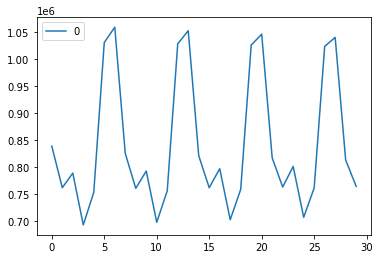

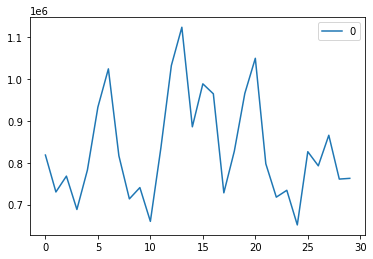

In [107]:
#predicitng

start=len(arimatrain)
end=len(arimatrain)+len(arimatest)-1
arima_pred=arimamodel.predict(start=start,end=end,typ='levels')
arima_pred = pd.DataFrame(arima_pred)
arima_pred.plot(legend=True)
arima_true.plot(legend=True)

In [110]:
#ROOT MEAN SQUARE
mean_squared_error(arima_pred,arima_true, squared = False)

86503.97579604412

In [111]:
#MEAN SQUARED LOG ERROR
mean_squared_log_error(arima_pred,arima_true)

0.00976594390536309

#### CONCLUSION
- The Arima model is a better fit, although more work needs to be done.

### MODEL 4

#### SARIMAX